## Correct imports

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten, Conv2D, MaxPool2D

## Load and preprocess data

In [12]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Reshape data to include channel dimension
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Build a new model

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [15]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.9148 - loss: 0.2803 - val_accuracy: 0.9814 - val_loss: 0.0648
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9860 - loss: 0.0431 - val_accuracy: 0.9890 - val_loss: 0.0313
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9906 - loss: 0.0284 - val_accuracy: 0.9908 - val_loss: 0.0294
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9935 - loss: 0.0193 - val_accuracy: 0.9912 - val_loss: 0.0262
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9962 - loss: 0.0121 - val_accuracy: 0.9897 - val_loss: 0.0304
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9968 - loss: 0.0109 - val_accuracy: 0.9912 - val_loss: 0.0286
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9971 - loss: 0.0083 - val_accuracy: 0.9896 - val_loss: 0.0386
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9970 -

## Evaluate the model

In [16]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 0.0291
Test accuracy: 0.9928


## Visualize results

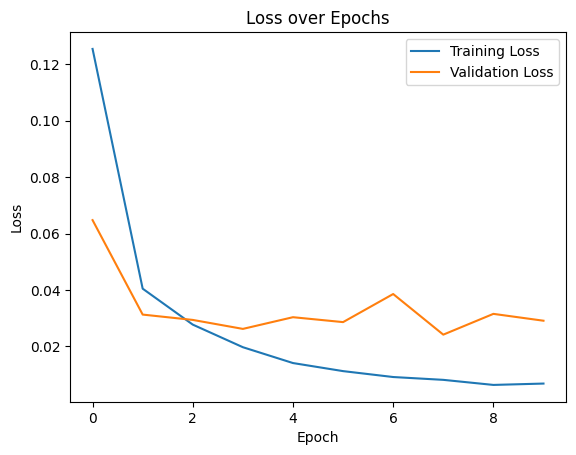

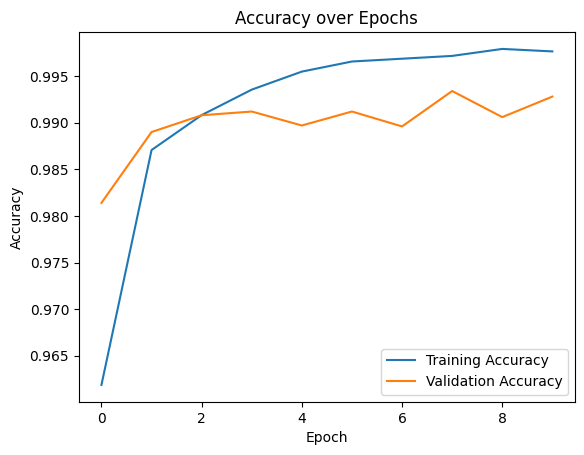

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


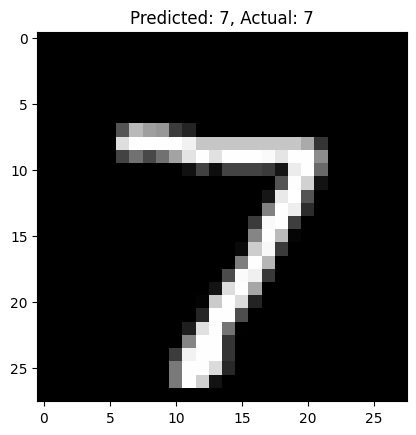

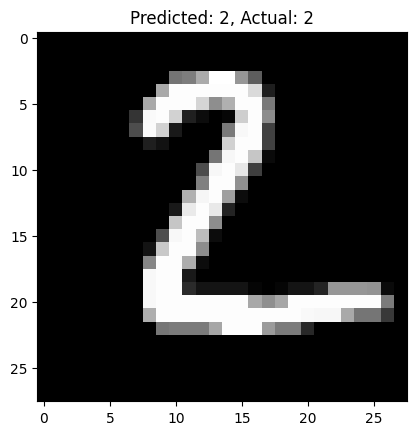

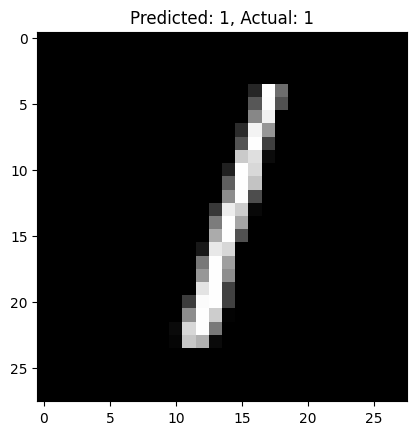

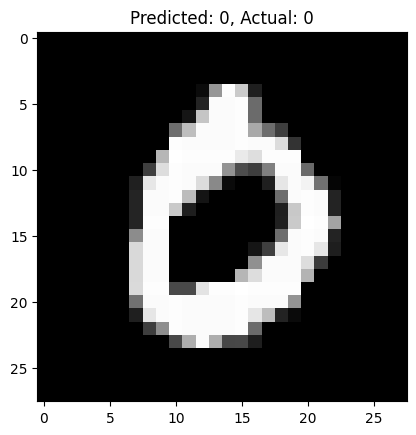

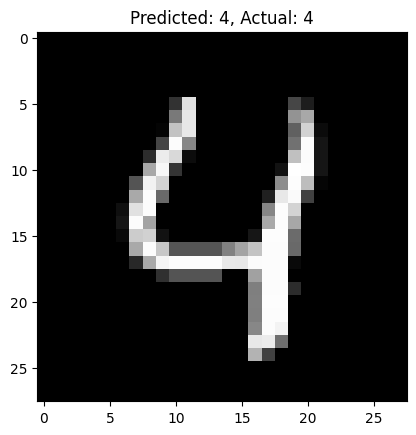

In [18]:
import numpy as np

# Get predictions for a few test images
predictions = model.predict(X_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

# Display the images and predictions
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}, Actual: {y_test[i]}')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


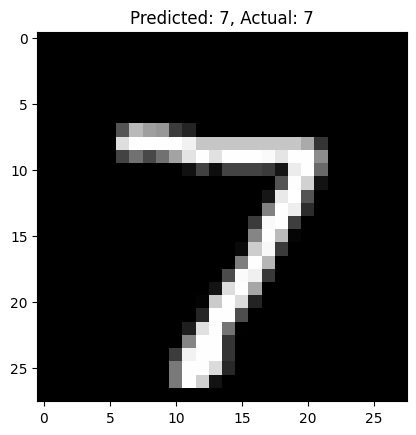

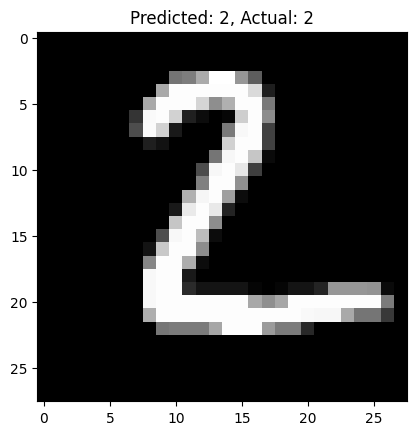

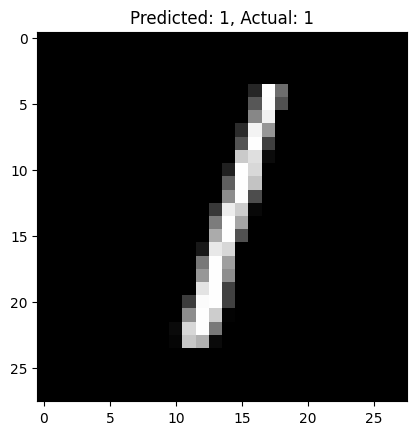

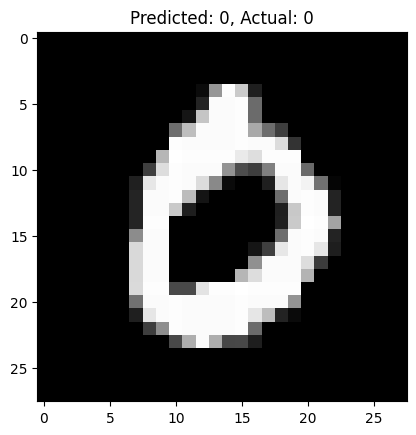

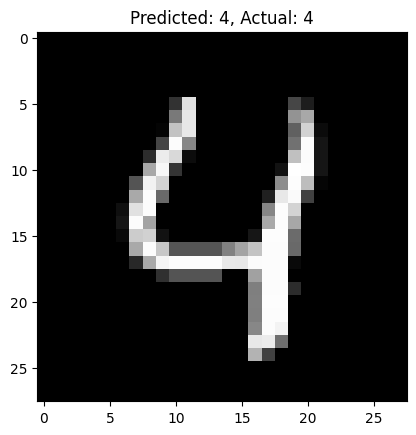

In [9]:
import numpy as np

# Get predictions for a few test images
predictions = model.predict(X_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

# Display the images and predictions
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}, Actual: {y_test[i]}')
    plt.show()

In [6]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.9966 - loss: 0.0098 - val_accuracy: 0.9916 - val_loss: 0.0369
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9971 - loss: 0.0081 - val_accuracy: 0.9913 - val_loss: 0.0373
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9979 - loss: 0.0062 - val_accuracy: 0.9895 - val_loss: 0.0458
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9982 - loss: 0.0061 - val_accuracy: 0.9890 - val_loss: 0.0487
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9986 - loss: 0.0049 - val_accuracy: 0.9885 - val_loss: 0.0643
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9981 - loss: 0.0052 - val_accuracy: 0.9917 - val_loss: 0.0397
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9990 - loss: 0.0032 - val_accuracy: 0.9904 - val_loss: 0.0439
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9983 -

# Task
Correct the code in cell "qX7dBAPTPU_3" to implement a different and more authentic approach for image classification using a convolutional neural network (CNN) on the MNIST dataset, providing step-by-step code.

## Correct imports

### Subtask:
Modify the first cell to include necessary libraries for a different model approach.


**Reasoning**:
The first step is to modify the import statements in the first cell to include the necessary libraries for building a CNN model, as specified in the instructions.



In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten, Conv2D, MaxPool2D

## Load and preprocess data

### Subtask:
Load the MNIST dataset and perform necessary preprocessing steps.


**Reasoning**:
Load the MNIST dataset, split it into training and testing sets, reshape the image data to include a channel dimension, and normalize the pixel values.



In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Reshape data to include channel dimension
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)
